In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Correlação de Pearson

In [ ]:
import pandas as pd
from scipy.stats import pearsonr


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Trabalhos/C&Saúde/P2/functions.simp.csv')

In [ ]:
df.head()

,Unnamed: 0,Description,GeneRatio,geneID
0,GO:0042063,gliogenesis,57/684,CX3CR1/GPR17/MAG/SLC45A3/TREM2/FA2H/MYRF/P2RY1...
1,GO:0006935,chemotaxis,49/684,CX3CR1/TREM2/P2RY12/C3AR1/CSF1R/ENPP2/LSP1/ITG...
2,GO:0061900,glial cell activation,15/684,CX3CR1/TREM2/ITGB2/CCL3/PTPRC/AIF1/ITGAM/TYROB...
3,GO:0001774,microglial cell activation,14/684,CX3CR1/TREM2/ITGB2/CCL3/PTPRC/AIF1/ITGAM/TYROB...
4,GO:0007015,actin filament organization,44/684,TF/SCIN/NCKAP1L/AIF1/USH1C/SHROOM4/MYO1F/CDC42...


In [ ]:
# Verificar se as colunas necessárias existem
if 'GeneRatio' in df.columns and 'geneID' in df.columns:
    # Função para converter GeneRatio para uma fração numérica
    def convert_gene_ratio(gene_ratio):
        numerator, denominator = map(int, gene_ratio.split('/'))
        return numerator / denominator

    # Aplicar a função de conversão à coluna GeneRatio
    df['GeneRatio_numeric'] = df['GeneRatio'].apply(convert_gene_ratio)

    # Contar o número de genes em geneID
    df['NumGenes'] = df['geneID'].str.split('/').apply(len)

    # Extrair as colunas de interesse
    gene_ratio = df['GeneRatio_numeric']
    num_genes = df['NumGenes']

    # Calcular a correlação de Pearson
    correlation, p_value = pearsonr(gene_ratio, num_genes)

    # Exibir os resultados
    print(f'Correlação de Pearson: {correlation}')
    print(f'Valor-p: {p_value}')


Correlação de Pearson: 1.0
Valor-p: 0.0


In [ ]:
df1 = pd.read_csv('/content/gdrive/MyDrive/Trabalhos/C&Saúde/P2/significantly_upregulated_genes.csv')

In [ ]:
df1.head()

,gene,SYMBOL,log2FoldChange,pvalue,padj
0,ENSG00000101327,PDYN,4.1498,1.232731e-07,0.0002
1,ENSG00000198502,HLA-DRB5,3.3204,1.198848e-02,0.0993
2,ENSG00000187775,DNAH17,3.1141,3.025404e-04,0.0253
3,ENSG00000274276,LOC102724560,3.1064,1.930725e-02,0.0993
4,ENSG00000168329,CX3CR1,3.0136,1.573917e-05,0.0042


In [ ]:
# Verificar se as colunas necessárias existem
if 'log2FoldChange' in df1.columns and 'padj' in df1.columns:
    # Extrair as colunas de interesse
    log2_fold_change = df1['log2FoldChange']
    padj = df1['padj']

    # Calcular a correlação de Pearson
    correlation, p_value = pearsonr(log2_fold_change, padj)

    # Exibir os resultados
    print(f'Correlação de Pearson: {correlation}')
    print(f'Valor-p: {p_value}')

Correlação de Pearson: -0.45094188583725364
Valor-p: 1.0759713584803002e-38


## Parte de junção dos genes e geração de imagem.

In [ ]:
!pip install pandas networkx matplotlib


             gene1            gene2  statistic    pvalue SYMBOL1 SYMBOL2
0  ENSG00000002586  ENSG00000042493   0.901105  0.000026    CD99    CAPG
1  ENSG00000002586  ENSG00000102032   0.852555  0.000213    CD99   RENBP
2  ENSG00000002586  ENSG00000187091   0.888848  0.000048    CD99   PLCD1
3  ENSG00000004468  ENSG00000041982   0.859659  0.000165    CD38     TNC
4  ENSG00000004468  ENSG00000099194   0.886578  0.000054    CD38     SCD
  function_id  gene_id
0  GO:0042063   CX3CR1
1  GO:0042063    GPR17
2  GO:0042063      MAG
3  GO:0042063  SLC45A3
4  GO:0042063    TREM2
Number of nodes: 780
Number of edges: 21394


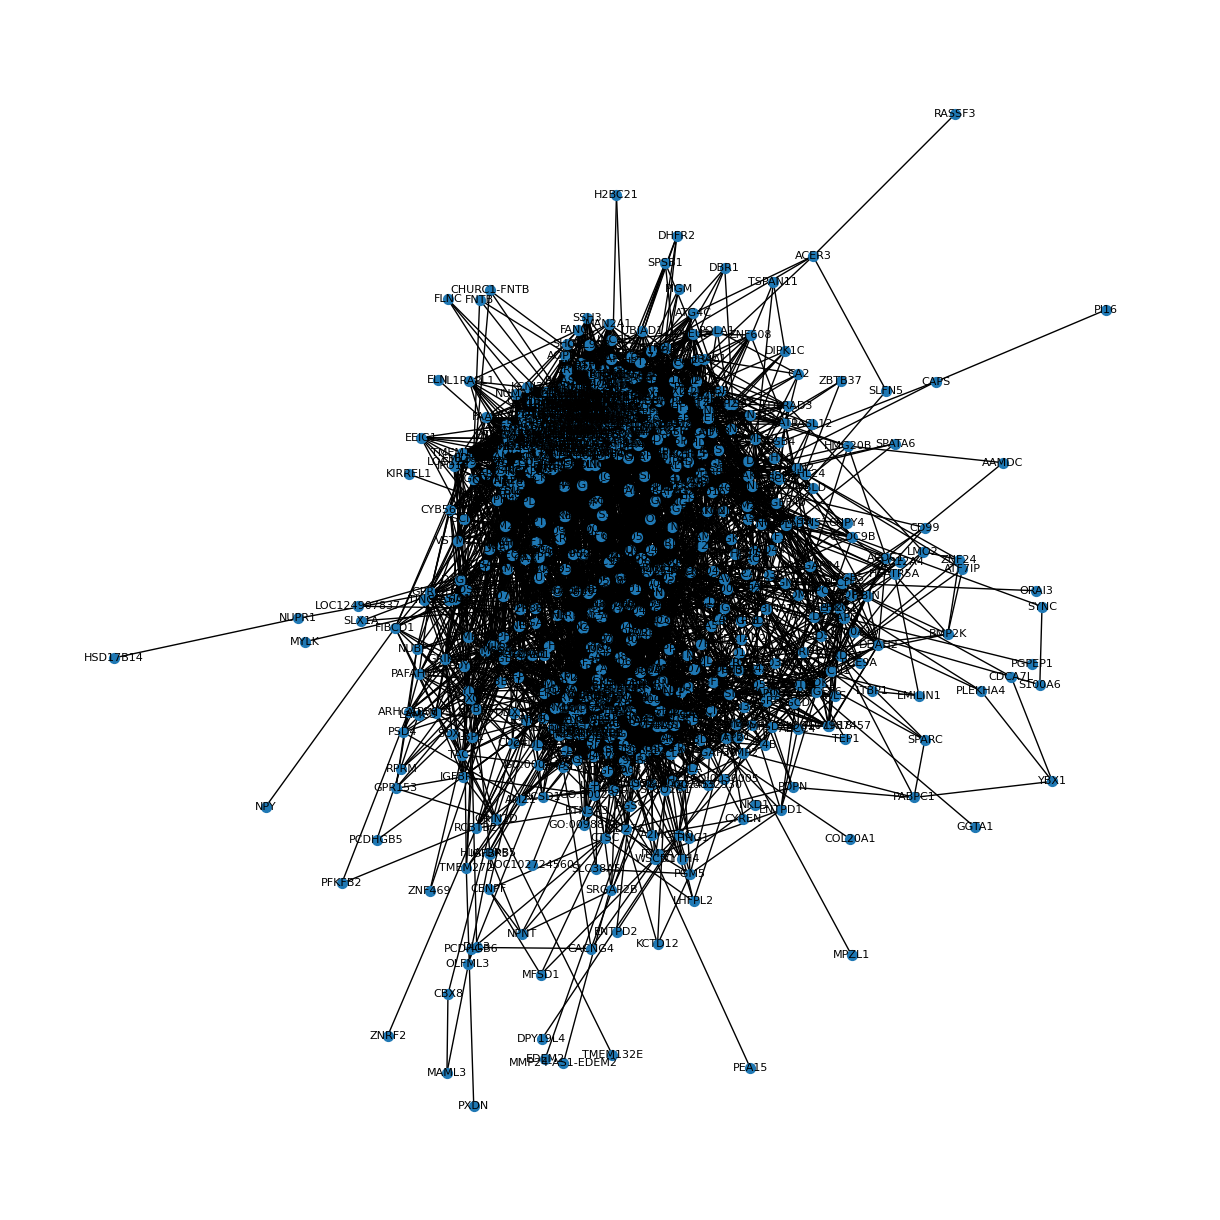

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Carregar os arquivos CSV
pearson_df = pd.read_csv('/content/gdrive/MyDrive/Trabalhos/C&Saúde/P2/pearson_with_symbol.filt.csv')
function_df = pd.read_csv('/content/gdrive/MyDrive/Trabalhos/C&Saúde/P2/functions.simp.clean.csv')

# Exibir as primeiras linhas dos DataFrames para garantir que estão corretos
print(pearson_df.head())
print(function_df.head())

# Criar um grafo para a rede de genes usando NetworkX
gene_network = nx.Graph()

# Adicionar arestas ao grafo a partir do arquivo de correlações (genes -> genes)
for index, row in pearson_df.iterrows():
    gene1 = row['SYMBOL1']
    gene2 = row['SYMBOL2']
    correlation = row['statistic']
    gene_network.add_edge(gene1, gene2, weight=correlation)

# Adicionar arestas ao grafo a partir do arquivo de funções (genes -> funções)
for index, row in function_df.iterrows():
    gene = row['gene_id']
    function = row['function_id']
    gene_network.add_edge(gene, function, relationship='gene-function')

# Verificar algumas informações sobre o grafo
print(f"Number of nodes: {gene_network.number_of_nodes()}")
print(f"Number of edges: {gene_network.number_of_edges()}")

# Opcional: Salvar o grafo combinado em um formato que pode ser visualizado (ex: GraphML)
nx.write_graphml(gene_network, 'combined_network.graphml')

# Opcional: Visualizar o grafo
pos = nx.spring_layout(gene_network)
plt.figure(figsize=(12, 12))
nx.draw(gene_network, pos, with_labels=True, node_size=50, font_size=8)
plt.show()

             gene1            gene2  statistic    pvalue SYMBOL1 SYMBOL2
0  ENSG00000002586  ENSG00000042493   0.901105  0.000026    CD99    CAPG
1  ENSG00000002586  ENSG00000102032   0.852555  0.000213    CD99   RENBP
2  ENSG00000002586  ENSG00000187091   0.888848  0.000048    CD99   PLCD1
3  ENSG00000004468  ENSG00000041982   0.859659  0.000165    CD38     TNC
4  ENSG00000004468  ENSG00000099194   0.886578  0.000054    CD38     SCD
  function_id  gene_id
0  GO:0042063   CX3CR1
1  GO:0042063    GPR17
2  GO:0042063      MAG
3  GO:0042063  SLC45A3
4  GO:0042063    TREM2
              gene        SYMBOL  log2FoldChange        pvalue    padj
0  ENSG00000101327          PDYN          4.1498  1.232731e-07  0.0002
1  ENSG00000198502      HLA-DRB5          3.3204  1.198848e-02  0.0993
2  ENSG00000187775        DNAH17          3.1141  3.025404e-04  0.0253
3  ENSG00000274276  LOC102724560          3.1064  1.930725e-02  0.0993
4  ENSG00000168329        CX3CR1          3.0136  1.573917e-05  0.004

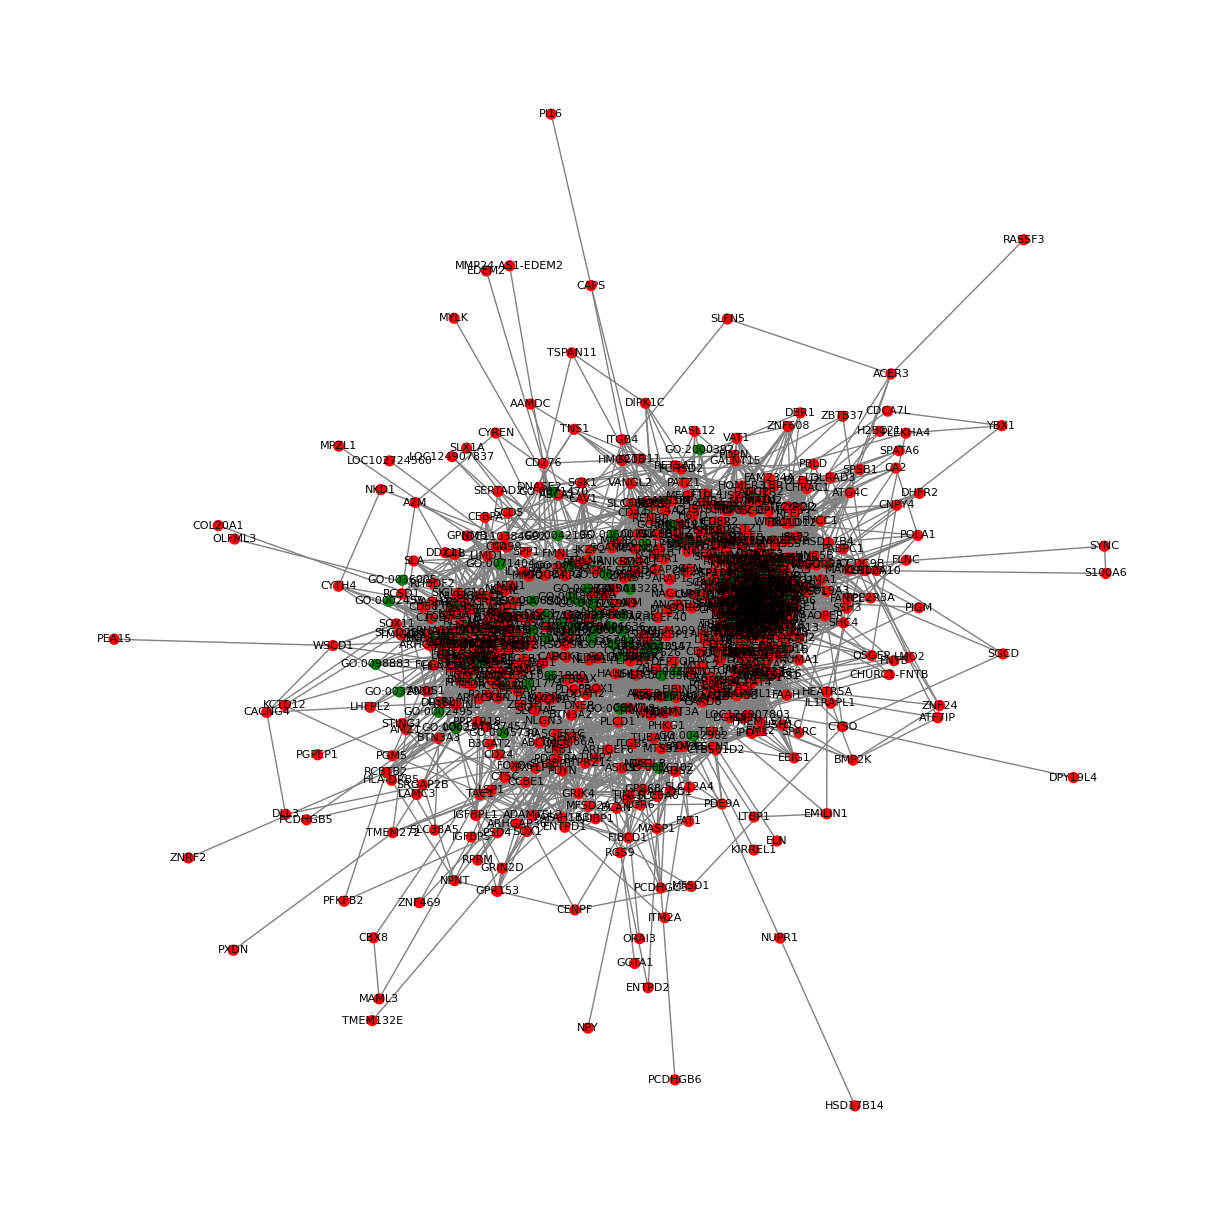

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os arquivos CSV
pearson_df = pd.read_csv('/content/gdrive/MyDrive/Trabalhos/C&Saúde/P2/pearson_with_symbol.filt.csv')
function_df = pd.read_csv('/content/gdrive/MyDrive/Trabalhos/C&Saúde/P2/functions.simp.clean.csv')
upregulated_df = pd.read_csv('/content/gdrive/MyDrive/Trabalhos/C&Saúde/P2/significantly_upregulated_genes.csv')

# Exibir as primeiras linhas dos DataFrames para garantir que estão corretos
print(pearson_df.head())
print(function_df.head())
print(upregulated_df.head())

# Criar um grafo para a rede de genes usando NetworkX
gene_network = nx.Graph()

# Adicionar nós de genes ao grafo, incluindo os atributos dos genes regulados diferencialmente
for index, row in upregulated_df.iterrows():
    gene = row['SYMBOL']
    gene_network.add_node(gene, type='gene', log2FoldChange=row['log2FoldChange'], pvalue=row['pvalue'], padj=row['padj'], upregulated=True)

# Adicionar nós de genes do arquivo de correlações que não estão na tabela de genes regulados diferencialmente
genes = set(pearson_df['SYMBOL1']).union(set(pearson_df['SYMBOL2']))
for gene in genes:
    if not gene_network.has_node(gene):
        gene_network.add_node(gene, type='gene', upregulated=False)

# Adicionar nós de funções ao grafo
functions = function_df['function_id'].unique()
for function in functions:
    gene_network.add_node(function, type='function')

# Adicionar arestas ao grafo a partir do arquivo de correlações (genes -> genes)
for index, row in pearson_df.iterrows():
    gene1 = row['SYMBOL1']
    gene2 = row['SYMBOL2']
    correlation = row['statistic']
    gene_network.add_edge(gene1, gene2, weight=correlation)

# Adicionar arestas ao grafo a partir do arquivo de funções (genes -> funções)
for index, row in function_df.iterrows():
    gene = row['gene_id']
    function = row['function_id']
    gene_network.add_edge(gene, function, relationship='gene-function')

# Verificar algumas informações sobre o grafo
print(f"Number of nodes: {gene_network.number_of_nodes()}")
print(f"Number of edges: {gene_network.number_of_edges()}")

# Encontrar a maior componente conectada
largest_cc = max(nx.connected_components(gene_network), key=len)
largest_cc_subgraph = gene_network.subgraph(largest_cc).copy()

# Atribuir cores aos nós
node_colors = []
for node in largest_cc_subgraph.nodes():
    if largest_cc_subgraph.nodes[node]['type'] == 'gene':
        if largest_cc_subgraph.nodes[node].get('upregulated', False):
            node_colors.append('red')
        else:
            node_colors.append('blue')
    else:
        node_colors.append('green')

# Visualizar o grafo
pos = nx.spring_layout(largest_cc_subgraph, seed=42)  # Definir uma semente para a disposição dos nós para reprodutibilidade
plt.figure(figsize=(12, 12))
nx.draw(largest_cc_subgraph, pos, with_labels=True, node_size=50, font_size=8, node_color=node_colors, edge_color='grey')
plt.show()


             gene1            gene2  statistic    pvalue SYMBOL1 SYMBOL2
0  ENSG00000002586  ENSG00000042493   0.901105  0.000026    CD99    CAPG
1  ENSG00000002586  ENSG00000102032   0.852555  0.000213    CD99   RENBP
2  ENSG00000002586  ENSG00000187091   0.888848  0.000048    CD99   PLCD1
3  ENSG00000004468  ENSG00000041982   0.859659  0.000165    CD38     TNC
4  ENSG00000004468  ENSG00000099194   0.886578  0.000054    CD38     SCD
  function_id  gene_id
0  GO:0042063   CX3CR1
1  GO:0042063    GPR17
2  GO:0042063      MAG
3  GO:0042063  SLC45A3
4  GO:0042063    TREM2
              gene        SYMBOL  log2FoldChange        pvalue    padj
0  ENSG00000101327          PDYN          4.1498  1.232731e-07  0.0002
1  ENSG00000198502      HLA-DRB5          3.3204  1.198848e-02  0.0993
2  ENSG00000187775        DNAH17          3.1141  3.025404e-04  0.0253
3  ENSG00000274276  LOC102724560          3.1064  1.930725e-02  0.0993
4  ENSG00000168329        CX3CR1          3.0136  1.573917e-05  0.004

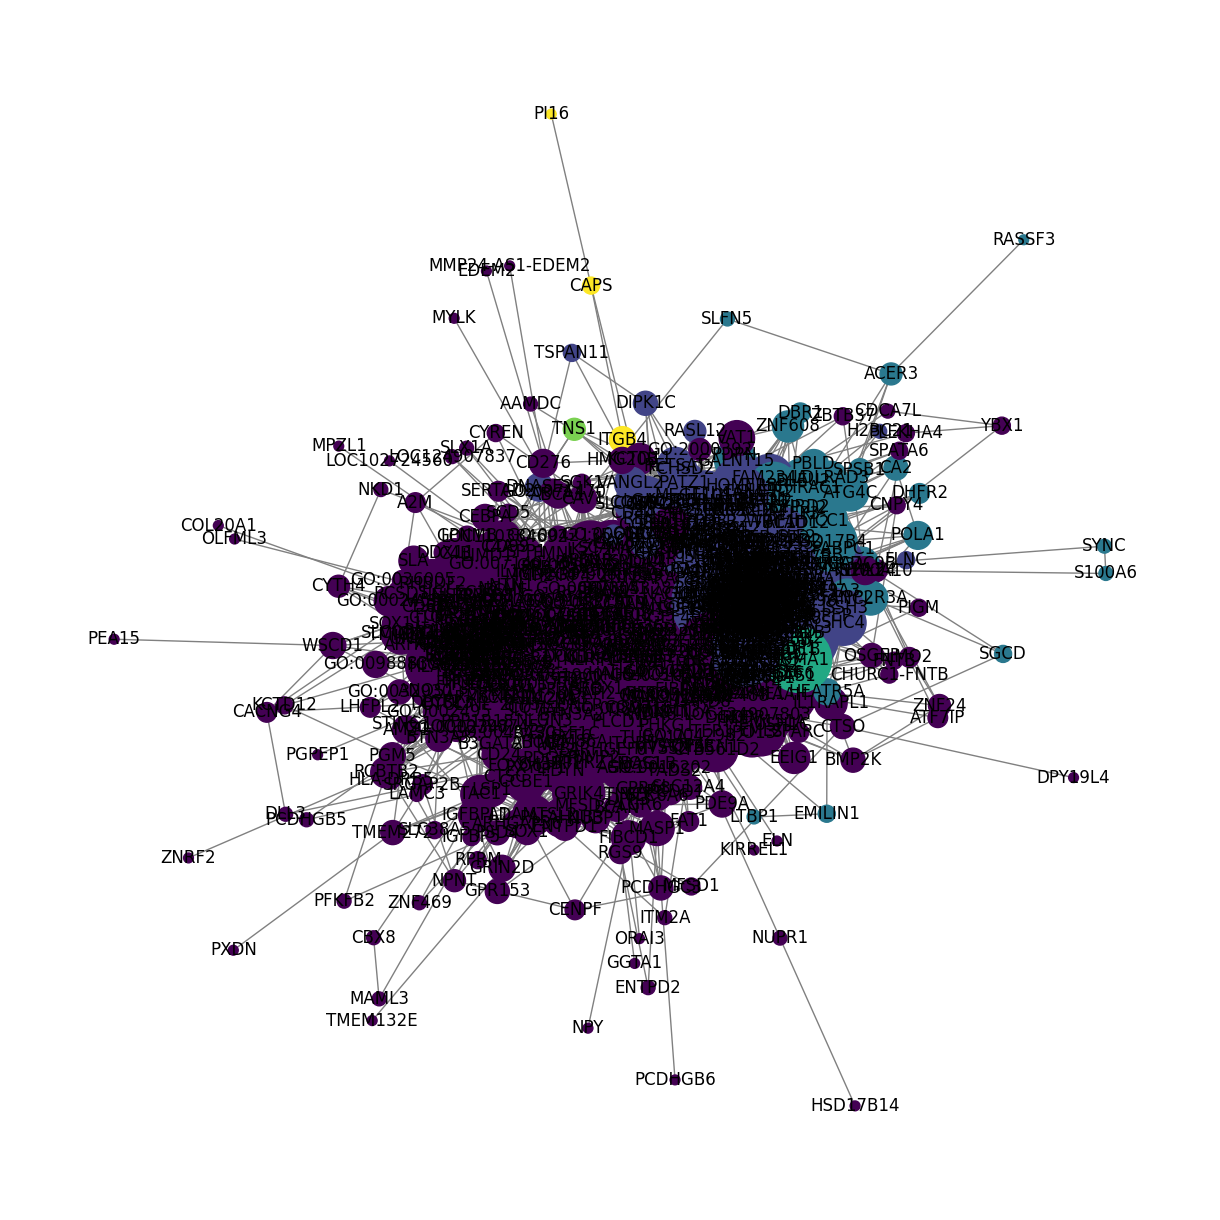

In [ ]:
import community
from networkx.algorithms.community import greedy_modularity_communities
# Exibir as primeiras linhas dos DataFrames para garantir que estão corretos
print(pearson_df.head())
print(function_df.head())
print(upregulated_df.head())

# Criar um grafo para a rede de genes usando NetworkX
gene_network = nx.Graph()

# Adicionar nós de genes ao grafo, incluindo os atributos dos genes regulados diferencialmente
for index, row in upregulated_df.iterrows():
    gene = row['SYMBOL']
    gene_network.add_node(gene, type='gene', log2FoldChange=row['log2FoldChange'], pvalue=row['pvalue'], padj=row['padj'], upregulated=True)

# Adicionar nós de genes do arquivo de correlações que não estão na tabela de genes regulados diferencialmente
genes = set(pearson_df['SYMBOL1']).union(set(pearson_df['SYMBOL2']))
for gene in genes:
    if not gene_network.has_node(gene):
        gene_network.add_node(gene, type='gene', upregulated=False)

# Adicionar nós de funções ao grafo
functions = function_df['function_id'].unique()
for function in functions:
    gene_network.add_node(function, type='function')

# Adicionar arestas ao grafo a partir do arquivo de correlações (genes -> genes)
for index, row in pearson_df.iterrows():
    gene1 = row['SYMBOL1']
    gene2 = row['SYMBOL2']
    correlation = row['statistic']
    gene_network.add_edge(gene1, gene2, weight=correlation)

# Adicionar arestas ao grafo a partir do arquivo de funções (genes -> funções)
for index, row in function_df.iterrows():
    gene = row['gene_id']
    function = row['function_id']
    gene_network.add_edge(gene, function, relationship='gene-function')

# Identificar nós isolados (sem conexões)
isolated_nodes = [node for node, degree in gene_network.degree() if degree == 0]

# Remover nós isolados
gene_network.remove_nodes_from(isolated_nodes)

# Encontrar as comunidades usando o algoritmo greedy_modularity_communities
communities = list(greedy_modularity_communities(gene_network))

# Atribuir cores aos nós com base na comunidade
node_colors = []
for node in gene_network.nodes():
    for i, community in enumerate(communities):
        if node in community:
            node_colors.append(i)

# Calcular o tamanho dos nós com base no grau
node_sizes = [50 * gene_network.degree[node] for node in gene_network.nodes()]

# Visualizar o grafo
pos = nx.spring_layout(gene_network, seed=42)  # Definir uma semente para a disposição dos nós para reprodutibilidade
plt.figure(figsize=(12, 12))
nx.draw(gene_network, pos, with_labels=True, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.viridis, edge_color='grey')
plt.show()

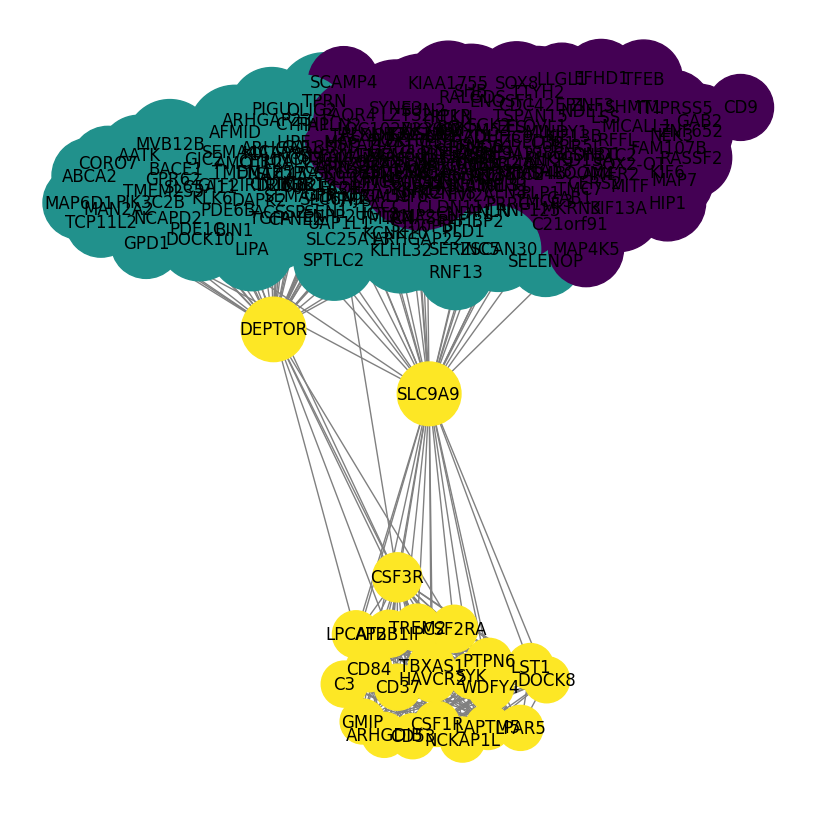

In [ ]:
# Criar um grafo para a rede de genes usando NetworkX
gene_network = nx.Graph()

# Adicionar nós de genes ao grafo, incluindo os atributos dos genes regulados diferencialmente
for index, row in upregulated_df.iterrows():
    gene = row['SYMBOL']
    gene_network.add_node(gene, type='gene', log2FoldChange=row['log2FoldChange'], pvalue=row['pvalue'], padj=row['padj'], upregulated=True)

# Adicionar nós de genes do arquivo de correlações que não estão na tabela de genes regulados diferencialmente
genes = set(pearson_df['SYMBOL1']).union(set(pearson_df['SYMBOL2']))
for gene in genes:
    if not gene_network.has_node(gene):
        gene_network.add_node(gene, type='gene', upregulated=False)

# Adicionar nós de funções ao grafo
functions = function_df['function_id'].unique()
for function in functions:
    gene_network.add_node(function, type='function')

# Adicionar arestas ao grafo a partir do arquivo de correlações (genes -> genes)
for index, row in pearson_df.iterrows():
    gene1 = row['SYMBOL1']
    gene2 = row['SYMBOL2']
    correlation = row['statistic']
    gene_network.add_edge(gene1, gene2, weight=correlation)

# Adicionar arestas ao grafo a partir do arquivo de funções (genes -> funções)
for index, row in function_df.iterrows():
    gene = row['gene_id']
    function = row['function_id']
    gene_network.add_edge(gene, function, relationship='gene-function')

# Identificar nós com grau menor que X e removê-los
nodes_to_remove = [node for node, degree in gene_network.degree() if degree < 70]
gene_network.remove_nodes_from(nodes_to_remove)

# Encontrar as comunidades usando o algoritmo greedy_modularity_communities
communities = list(greedy_modularity_communities(gene_network))

# Atribuir cores aos nós com base na comunidade
node_colors = []
for node in gene_network.nodes():
    for i, community in enumerate(communities):
        if node in community:
            node_colors.append(i)

# Calcular o tamanho dos nós com base no grau
node_sizes = [50 * gene_network.degree[node] for node in gene_network.nodes()]

# Visualizar o grafo
pos = nx.spring_layout(gene_network, seed=42)  # Definir uma semente para a disposição dos nós para reprodutibilidade
plt.figure(figsize=(8, 8))
nx.draw(gene_network, pos, with_labels=True, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.viridis, edge_color='grey')
plt.show()


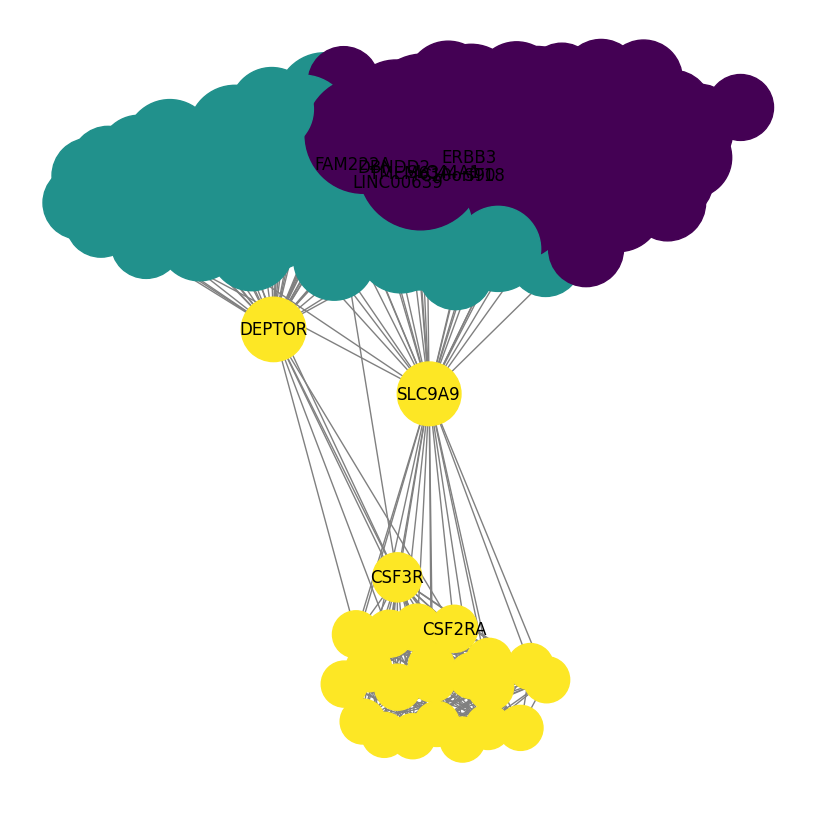

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import greedy_modularity_communities

# Criar um grafo para a rede de genes usando NetworkX
gene_network = nx.Graph()

# Adicionar nós de genes ao grafo, incluindo os atributos dos genes regulados diferencialmente
for index, row in upregulated_df.iterrows():
    gene = row['SYMBOL']
    gene_network.add_node(gene, type='gene', log2FoldChange=row['log2FoldChange'], pvalue=row['pvalue'], padj=row['padj'], upregulated=True)

# Adicionar nós de genes do arquivo de correlações que não estão na tabela de genes regulados diferencialmente
genes = set(pearson_df['SYMBOL1']).union(set(pearson_df['SYMBOL2']))
for gene in genes:
    if not gene_network.has_node(gene):
        gene_network.add_node(gene, type='gene', upregulated=False)

# Adicionar nós de funções ao grafo
functions = function_df['function_id'].unique()
for function in functions:
    gene_network.add_node(function, type='function')

# Adicionar arestas ao grafo a partir do arquivo de correlações (genes -> genes)
for index, row in pearson_df.iterrows():
    gene1 = row['SYMBOL1']
    gene2 = row['SYMBOL2']
    correlation = row['statistic']
    gene_network.add_edge(gene1, gene2, weight=correlation)

# Adicionar arestas ao grafo a partir do arquivo de funções (genes -> funções)
for index, row in function_df.iterrows():
    gene = row['gene_id']
    function = row['function_id']
    gene_network.add_edge(gene, function, relationship='gene-function')

# Identificar nós com grau menor que X e removê-los
nodes_to_remove = [node for node, degree in gene_network.degree() if degree < 70]
gene_network.remove_nodes_from(nodes_to_remove)

# Encontrar as comunidades usando o algoritmo greedy_modularity_communities
communities = list(greedy_modularity_communities(gene_network))

# Atribuir cores aos nós com base na comunidade
node_colors = []
for node in gene_network.nodes():
    for i, community in enumerate(communities):
        if node in community:
            node_colors.append(i)

# Calcular o tamanho dos nós com base no grau
node_sizes = [50 * gene_network.degree[node] for node in gene_network.nodes()]

# Identificar os 5 maiores nós de cada comunidade
top_nodes_per_community = {}
for community in communities:
    community_nodes = list(community)
    sorted_nodes = sorted(community_nodes, key=lambda x: gene_network.degree[x], reverse=True)
    top_nodes_per_community.update({node: node for node in sorted_nodes[:4]})

# Visualizar o grafo
pos = nx.spring_layout(gene_network, seed=42)  # Definir uma semente para a disposição dos nós para reprodutibilidade
plt.figure(figsize=(8, 8))
nx.draw(gene_network, pos, with_labels=True, labels=top_nodes_per_community, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.viridis, edge_color='grey')
plt.show()

In [ ]:
# Gerar uma lista dos 8 nós principais com base na visualização, misturados entre função e gene(e o grau)
top_nodes = sorted(gene_network.nodes(), key=lambda x: gene_network.degree[x], reverse=True)[:8]
print("Lista dos 8 nós principais:")
i = 0
for community in communities:
    i+=1
    community_nodes = list(community)
    sorted_nodes = sorted(community_nodes, key=lambda x: gene_network.degree[x], reverse=True)
    for node in sorted_nodes[:4]:
      print(f"Nó: {node}, Grau: {gene_network.degree[node]}, Comunidade: {i}")

Lista dos 8 nós principais:
Nó: ERBB3, Grau: 181, Comunidade: 1
Nó: SLC44A1, Grau: 181, Comunidade: 1
Nó: ST18, Grau: 176, Comunidade: 1
Nó: C10orf90, Grau: 174, Comunidade: 1
Nó: DBNDD2, Grau: 190, Comunidade: 2
Nó: TMEM63A, Grau: 182, Comunidade: 2
Nó: LINC00639, Grau: 174, Comunidade: 2
Nó: FAM222A, Grau: 173, Comunidade: 2
Nó: DEPTOR, Grau: 43, Comunidade: 3
Nó: SLC9A9, Grau: 42, Comunidade: 3
Nó: CSF3R, Grau: 25, Comunidade: 3
Nó: CSF2RA, Grau: 23, Comunidade: 3
